In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
directory = r'C:\\Users\\Camila - bioinfo\\Documents\\ESTÁGIO LGHM - BIOINFO - CAMILA\\DATASETS\\CONTROLE QUALIDADE\\FST\\FST_STATISTICS'
files = os.listdir(directory)

data=[]

for filename in files:
    path = os.path.join(directory, filename)

    if os.path.isfile(path):
        df = pd.read_csv(path, sep='\t')
        df.dropna(inplace=True)
        data.append(df)

In [ ]:
#0 - 0.05: little genetic differentiation
#0.05 - 0.15: moderate
#0.15 - 0.25: large 
#>0.25: very large

In [7]:
groups = ['NAT vs. (ACB e ASW)', 'NAT vs. AFR', 'NAT vs. AMR', 'NAT vs. EAS', 'NAT vs. EUR',  '(ACB e ASW) vs. AFR',
'(ACB e ASW) vs. EAS', '(ACB e ASW) vs. AMR', '(ACB e ASW) vs. EUR', 'AFR vs. AMR', 'AFR vs. EAS', 'AFR vs. EUR', 'AMR vs. EAS', 
'AMR vs. EUR', 'EUR vs. EAS']

snps_mod = []

for i in range(len(data)):
    new = data[i].loc[(data[i].FST>0.05)].sort_values(by='FST', ascending=True)
    new.iloc[:,0] = groups[i]
    
    snps_mod.append(new)    

In [ ]:
#np.savetxt('EURvsEAS_snps_fst.txt', snps_mod[13], fmt='%s', delimiter=' ', header=('POP SNP POS NMISS FST'))

In [3]:
little =[]
moderate = []
large = []
very_large = []

for i in range(len(data)):
    littler = len(data[i].loc[(data[i].FST>0)&(data[i].FST<=0.05), "FST"].values)
    moderater = len(data[i].loc[(data[i].FST>0.05)&(data[i].FST<=0.15), "FST"].values)
    larger = len(data[i].loc[(data[i].FST>0.15)&(data[i].FST<=0.25), "FST"].values)
    v_larger = len(data[i].loc[(data[i].FST>0.25), "FST"].values)
    
    little.append(littler)
    moderate.append(moderater)
    large.append(larger)
    very_large.append(v_larger)
    
    #diff_ = {'little':little, 'moderate': moderate, 'large':large, 'very large': very_large}

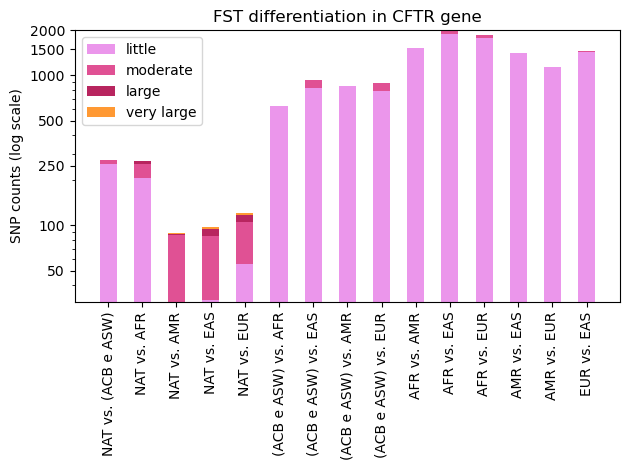

In [6]:
groups = ('NAT vs. (ACB e ASW)', 'NAT vs. AFR', 'NAT vs. AMR', 'NAT vs. EAS', 'NAT vs. EUR',  '(ACB e ASW) vs. AFR',
'(ACB e ASW) vs. EAS', '(ACB e ASW) vs. AMR', '(ACB e ASW) vs. EUR', 'AFR vs. AMR', 'AFR vs. EAS', 'AFR vs. EUR', 'AMR vs. EAS', 
'AMR vs. EUR', 'EUR vs. EAS')

width =0.5

#fig, [ax, ax1] = plt.subplots(1,2, figsize=(10,4))
fig, ax = plt.subplots()
bottom = np.zeros(15)

#color = {'little':'#E05194', 'moderate':'#EB96EB', 'large':'#B8255F'}

ax.bar(groups, little, width, color = '#EB96EB', label ='little', log=True)
ax.bar(groups, moderate, width, bottom = little, color='#E05194', label='moderate', log=True)
ax.bar(groups, large, width, bottom = np.add(little, moderate), color='#B8255F', label='large', log=True)
ax.bar(groups, very_large, width, bottom = np.add(np.add(little, moderate), large), 
       color='#FF9933', label='very large', log=True)

#ax1.bar(groups, little, width, color = '#EB96EB', label ='little')
#ax1.bar(groups, moderate, width, bottom = little, color='#E05194', label='moderate')
#ax1.bar(groups, large, width, bottom = np.add(little, moderate), color='#B8255F', label='large')
#ax1.bar(groups, very_large, width, bottom = np.add(np.add(little, moderate), large), 
       #color='#FF9933', label='very large')


ax.set_title("FST differentiation in CFTR gene")
ax.legend(loc="upper left")
ax.set_ylabel('SNP counts (log scale)')
ax.tick_params(axis='x', labelrotation=90)
ax.set_yticks((50, 100, 250, 500, 1000, 1500, 2000),(50,10**2, 25*10, 5*10**2, 10**3, 15*10**2, 200*10))


#ax1.set_title("FST differentiation in CFTR gene")
#ax1.legend(loc="upper left")
#ax1.set_ylabel('SNP counts')
#ax1.tick_params(axis='x', labelrotation=90)

plt.tight_layout()
#plt.savefig("all_pops_fst.png", dpi=300, bbox_inches='tight')
plt.show()


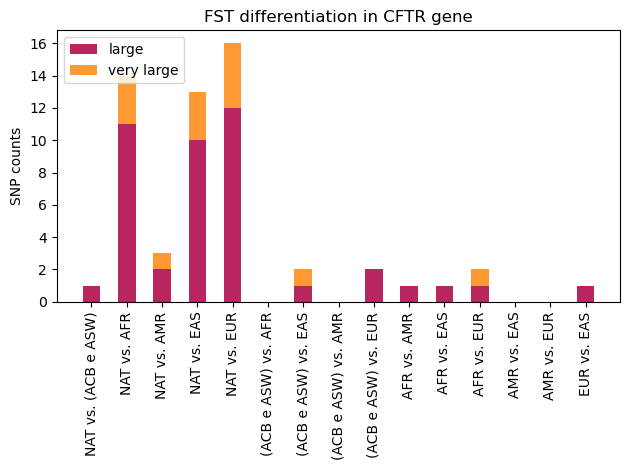

In [8]:
width =0.5

fig, ax = plt.subplots()
bottom = np.zeros(15)

#color = {'little':'#E05194', 'moderate':'#EB96EB', 'large':'#B8255F'}

#ax.bar(groups, moderate, width, color='#E05194', label='moderate')
ax.bar(groups, large, width, color='#B8255F', label='large')
ax.bar(groups, very_large, width, bottom = large, 
       color='#FF9933', label='very large')


ax.set_title("FST differentiation in CFTR gene")
ax.legend(loc="upper left")
ax.set_ylabel('SNP counts')
ax.tick_params(axis='x', labelrotation=90)

plt.tight_layout()
#plt.savefig("fst_large.png", dpi=300, bbox_inches='tight')
plt.show()

In [9]:
directory = r'C:\\Users\\Camila - bioinfo\\Documents\\ESTÁGIO LGHM - BIOINFO - CAMILA\\DATASETS\\CONTROLE QUALIDADE\\FST\\FST_LATIN_AMR'
files = os.listdir(directory)

data_amr=[]

for filename in files:
    path = os.path.join(directory, filename)
    print(filename)

    if os.path.isfile(path):
        df = pd.read_csv(path, sep='\t')
        df.dropna(inplace=True)
        data_amr.append(df)

CLM_MXL_CFTR_FST.txt
CLM_PEL_CFTR_FST.txt
CLM_PUR_CFTR_FST.txt
MXL_PEL_CFTR_FST.txt
MXL_PUR_CFTR_FST.txt
PEL_PUR_CFTR_FST.txt


In [10]:
little_amr =[]
moderate_amr = []
large_amr = []
very_large_amr = []

for i in range(len(data_amr)):
    littler = len(data_amr[i].loc[(data_amr[i].FST>0)&(data_amr[i].FST<=0.05), "FST"].values)
    moderater = len(data_amr[i].loc[(data_amr[i].FST>0.05)&(data_amr[i].FST<=0.15), "FST"].values)
    larger = len(data_amr[i].loc[(data_amr[i].FST>0.15)&(data_amr[i].FST<=0.25), "FST"].values)
    v_larger = len(data_amr[i].loc[(data_amr[i].FST>0.25), "FST"].values)
    
    little_amr.append(littler)
    moderate_amr.append(moderater)
    large_amr.append(larger)
    very_large_amr.append(v_larger)

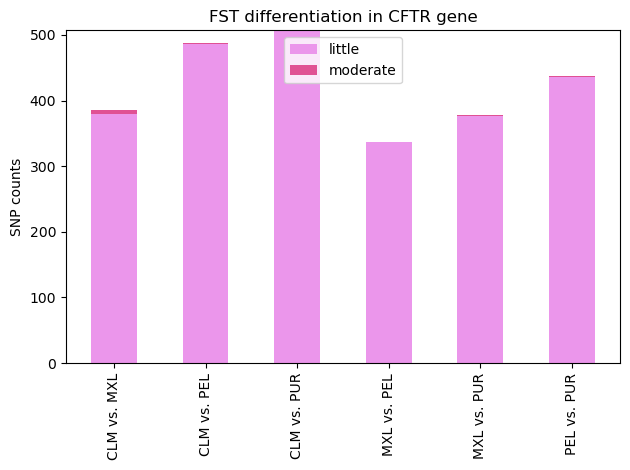

In [47]:
groups = ('CLM vs. MXL',
'CLM vs. PEL',
'CLM vs. PUR',
'MXL vs. PEL',
'MXL vs. PUR',
'PEL vs. PUR')

width =0.5

fig, ax = plt.subplots()
bottom = np.zeros(6)

#color = {'little':'#E05194', 'moderate':'#EB96EB', 'large':'#B8255F'}

ax.bar(groups, little_amr, width, color = '#EB96EB', label ='little')
ax.bar(groups, moderate_amr, width, bottom = little_amr, color='#E05194', label='moderate')

ax.set_title("FST differentiation in CFTR gene")
ax.legend(loc="best")
ax.set_ylabel('SNP counts')
ax.tick_params(axis='x', labelrotation=90)
#ax.set_yticks((400, 500),(4*10**2, 5*10**2))

plt.tight_layout()
#plt.savefig("AMR_FST.png", dpi=300, bbox_inches='tight')
plt.show()

In [35]:
X = [i for i in moderate_amr if i != 0]
X

[6, 1, 1, 1]

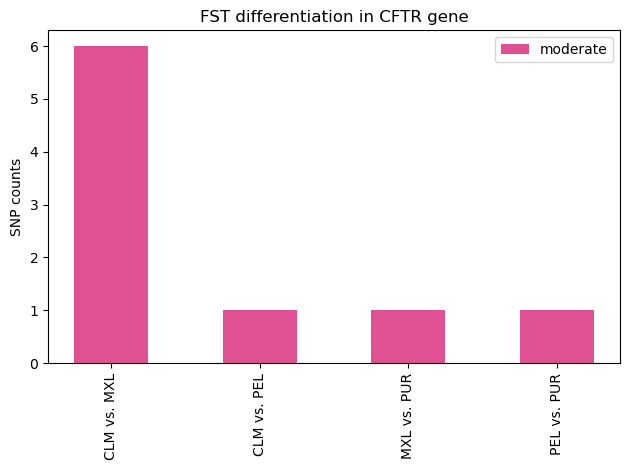

In [42]:
groups = ('CLM vs. MXL',
'CLM vs. PEL',
'MXL vs. PUR',
'PEL vs. PUR')

width =0.5

#fig, [ax, ax1] = plt.subplots(1,2, figsize=(10,4))
fig, ax = plt.subplots()
bottom = np.zeros(4)

#color = {'little':'#E05194', 'moderate':'#EB96EB', 'large':'#B8255F'}

ax.bar(groups, X, width, color='#E05194', label='moderate')
#ax.bar(groups, large_amr, width, bottom = np.add(little_amr, moderate_amr), color='#B8255F', label='large', log=True)
#ax.bar(groups, very_large_amr, width, bottom = np.add(np.add(little_amr, moderate_amr), large_amr), 
       #color='#FF9933', label='very large', log=True)


ax.set_title("FST differentiation in CFTR gene")
ax.legend(loc="best")
ax.set_ylabel('SNP counts')
ax.tick_params(axis='x', labelrotation=90)
#ax.set_yticks((400, 500),(4*10**2, 5*10**2))

plt.tight_layout()
#plt.savefig("AMR_FST_moderate.png", dpi=300, bbox_inches='tight')
plt.show()